# **Лабораторная работа №5. Визуализация данных**

In [103]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Matplotlib version: {mpl.__version__}")

%matplotlib inline

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Numpy version: 2.0.2
Matplotlib version: 3.10.0


Задача 1

Постройте два линейных графика функции $y=\frac{2}{x}+3$ на одной оси координат, первый для диапазона x=[-10;0], а второй для x=[0;7].

*   Графики должны быть помещены на оси с пределами xlim(-10, 10) и ylim(-10, 10), иметь подписи к осям, легенду и заголовок.
*   Первый график должен быть красного цвета и нарисован штрихпунктирной линией
*   Второй график должен иметь цвет (1.0,0.2,0.3) и нарисован сплошной линией





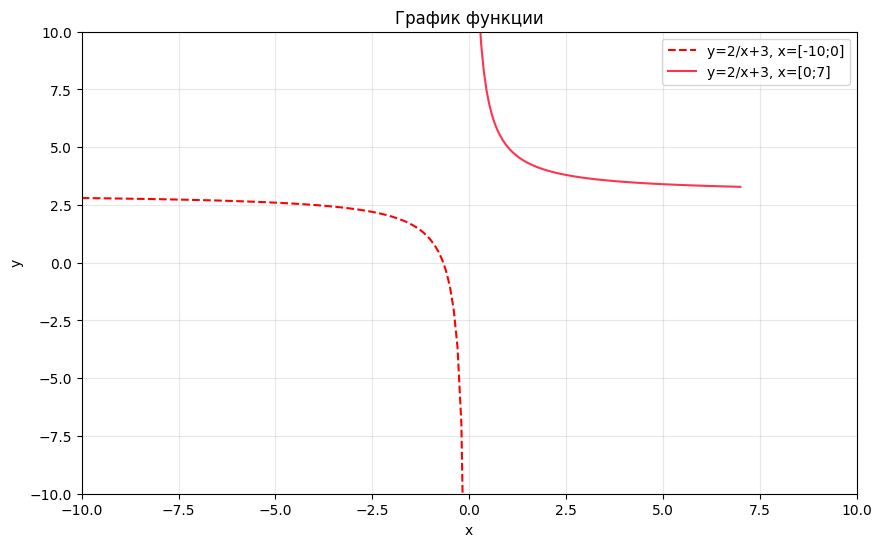

In [ ]:
x1 = np.linspace(-10, -0.1, 100)
y1 = 2/x1 + 3

x2 = np.linspace(0.1, 7, 100)
y2 = 2/x2 + 3

plt.figure(figsize=(10, 6))
plt.plot(x1, y1, color ='red', label='y=2/x+3, x=[-10;0]', linestyle = "--")
plt.plot(x2, y2, color=(1.0, 0.2, 0.3), label='y=2/x+3, x=[0;7]', linestyle = "-")
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('График функции')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Задача 2

Постройте диаграмму рассеяния для набора данных titanic (файл ./data/titanic.csv).

*   По оси X - возврат пассажира (Age)
*   По оси Y - стоимость билета (Fare)
*   Для выживших пассажиров используется маркер зеленый круг (Survived)
*   Для не выживших пассажиров используется маркер красный крест (Survived)
*   График должен подписи к осям и легенду и заголовок

Данные для которых не указан возврат или стоимость билета должны быть исключены




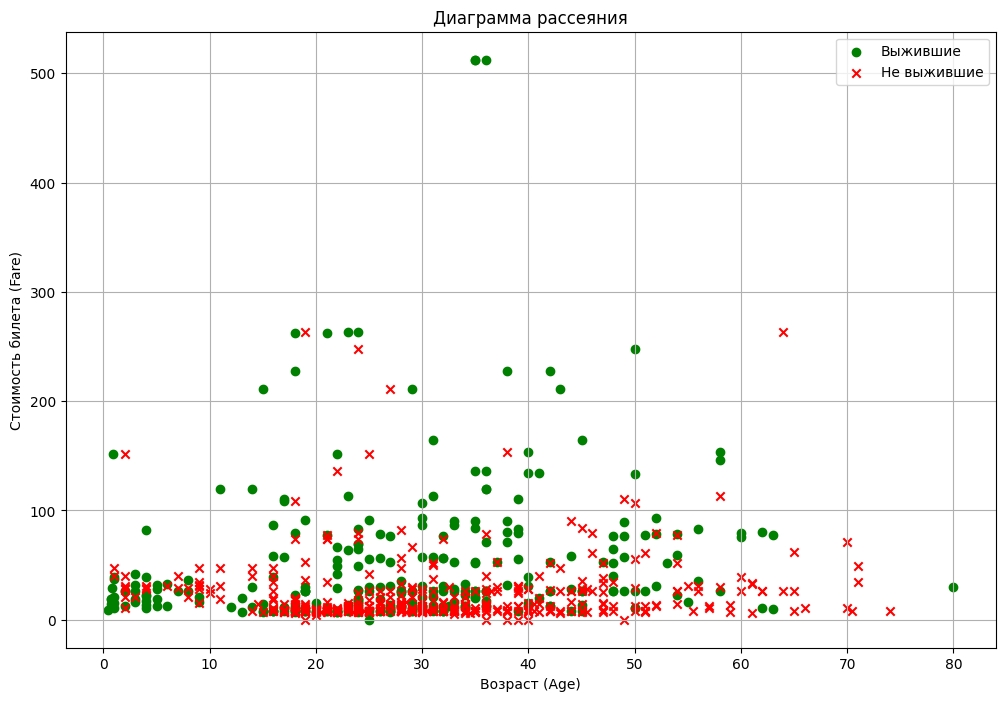

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/akobzarev/dap-2024/main/les05/data/titanic.csv'
titanic_data = pd.read_csv(url)
titanic_data_clean = titanic_data.dropna(subset=['Age', 'Fare'])

plt.figure(figsize=(12, 8))
survived = titanic_data_clean[titanic_data_clean['Survived'] == 1]
not_survived = titanic_data_clean[titanic_data_clean['Survived'] == 0]

plt.scatter(survived['Age'], survived['Fare'], c='green', marker='o',
           label='Выжившие')
plt.scatter(not_survived['Age'], not_survived['Fare'], c='red', marker='x',
           label='Не выжившие')

plt.xlabel('Возраст (Age)')
plt.ylabel('Стоимость билета (Fare)')
plt.title('Диаграмма рассеяния')
plt.legend()
plt.grid(True)
plt.show()

Задача 3

Для первоначального анализа данных часто используются диаграммы рассеяния для всех признаков из набора данных. Это позволяет визуально увидеть зависимости между признаками и выбросы. Для набора данных iris постройте на одном холсте 16 диаграмм рассеяния показывающих зависимости между всеми признаками набора ('sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)')

*   Холст должен содержать 16 графиков на отдельных осях (см. иллюстрацию к статье в Википедия)
*   Цвет маркеров должен зависеть от вида ирисов (iris.target)
*   Графики должны иметь подписи к осям, легенду и общий заголовок



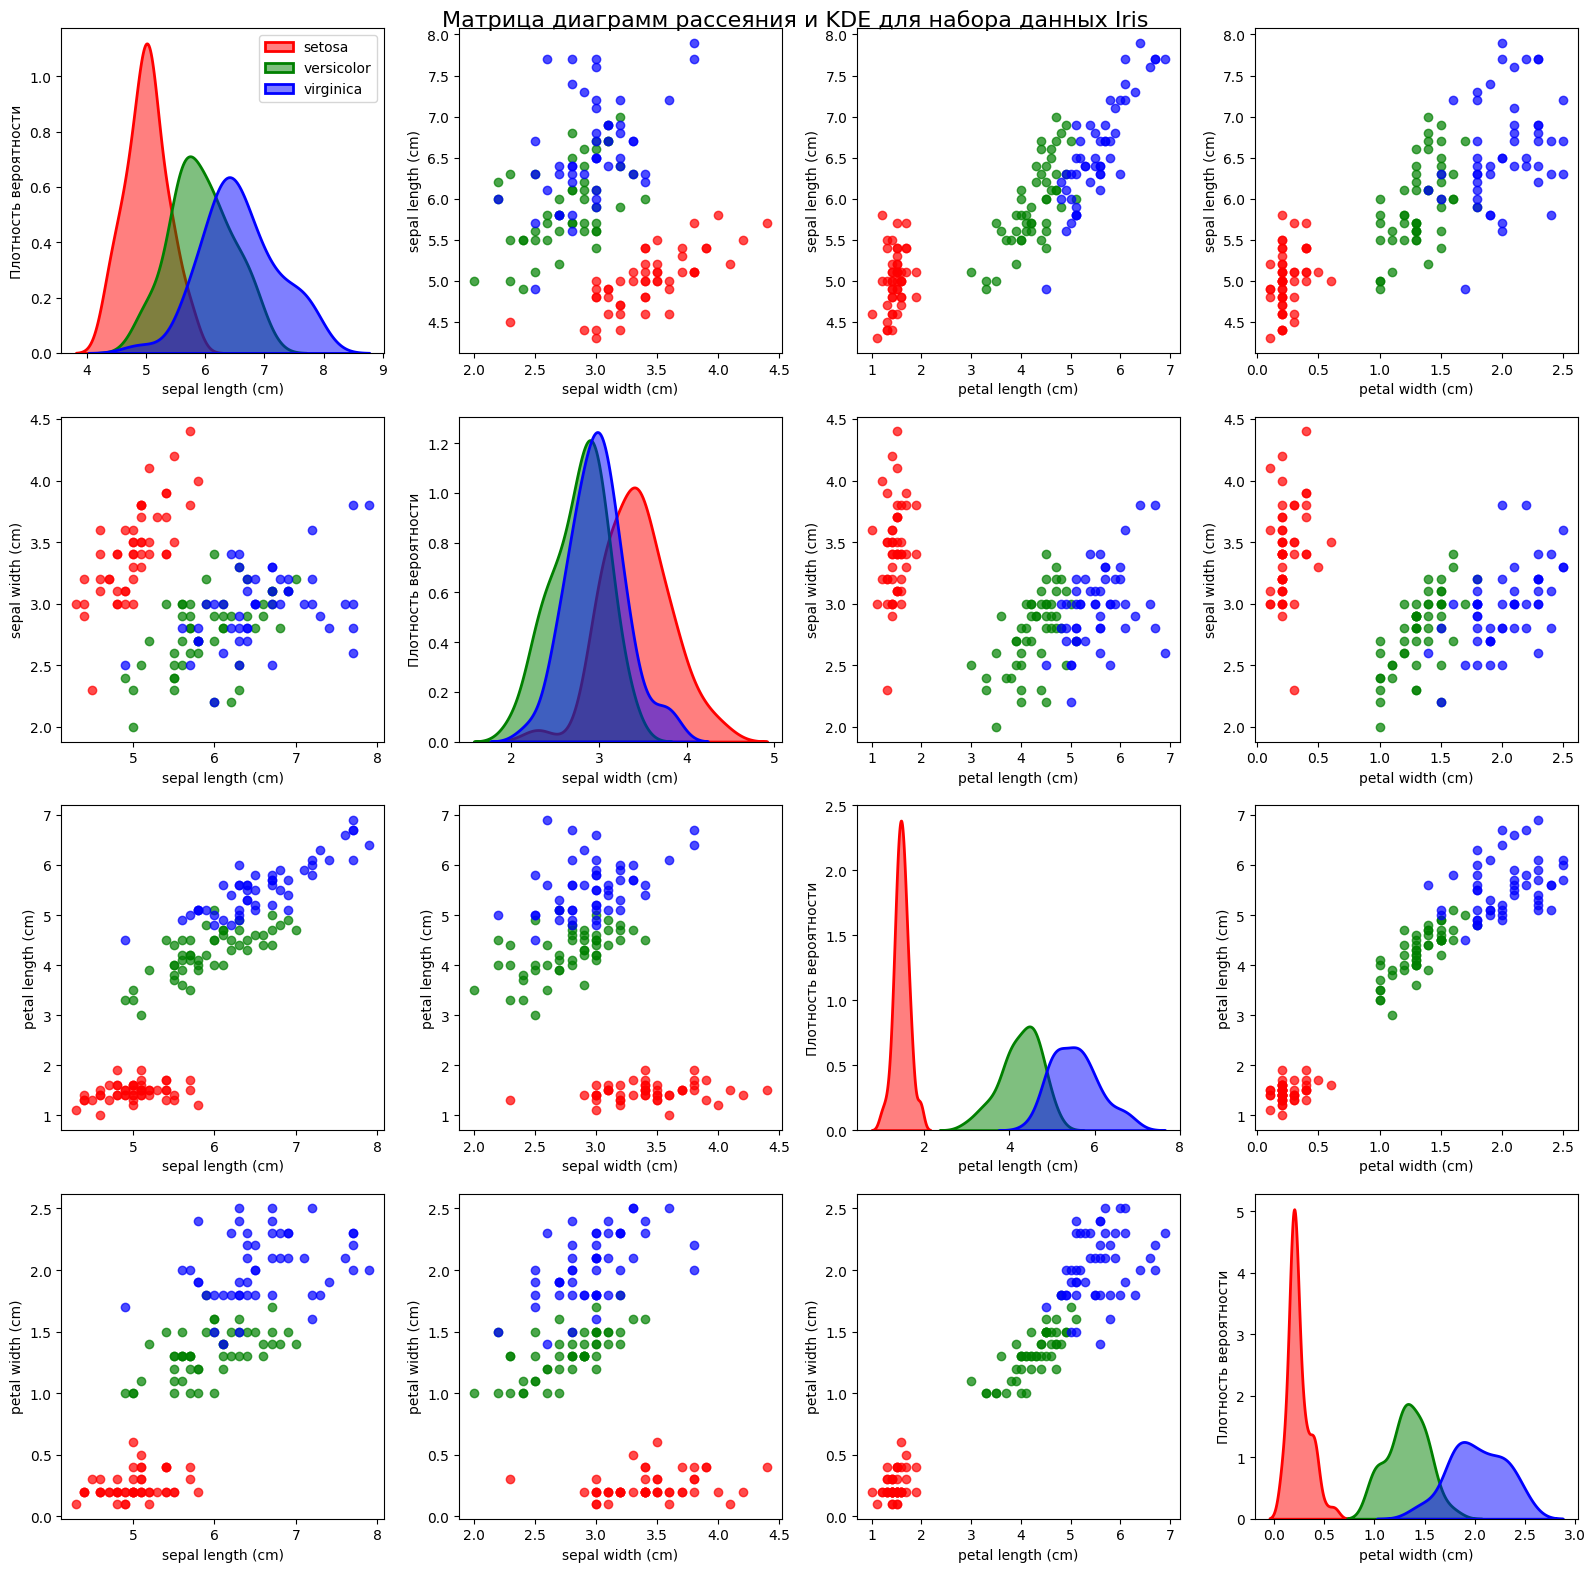

In [105]:
from sklearn.datasets import load_iris
import seaborn as sns
iris = load_iris()

X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

fig, axes = plt.subplots(4, 4, figsize=(16, 16))
fig.suptitle("Матрица диаграмм рассеяния и набора данных Iris", fontsize=16)

colors = ["red", "green", "blue"]

for i in range(4):
    for j in range(4):
        if i == j:

            for target in range(3):
                sns.kdeplot(X[y == target, i], ax=axes[i, j],
                           color=colors[target], label=target_names[target],
                           fill=True, alpha=0.5, linewidth=2)
            axes[i, j].set_xlabel(feature_names[i])
            axes[i, j].set_ylabel("Плотность вероятности")
        else:

            for target in range(3):
                axes[i, j].scatter(X[y == target, j], X[y == target, i],
                                  c=colors[target], alpha=0.7, label=target_names[target])
            axes[i, j].set_xlabel(feature_names[j])
            axes[i, j].set_ylabel(feature_names[i])
        if i == 0 and j == 0:
            axes[i, j].legend()

plt.tight_layout()
plt.show()

Задача 4

Постройте на одном холсте и разный осях следующие распределения для набора данных titanic (./data/titanic.csv):

*   Постройте гистограмму распределения пассажиров по возрасту (Age). Интервал 5 лет.
*   Постройте гистограмму распределения пассажиров женского пола по стоимости билетов (Fare). Подберите удобный интервал
*   График должен иметь подписи к осям, легенду и заголовок

Данные для которых не указан возраст или стоимость билета должны быть исключены

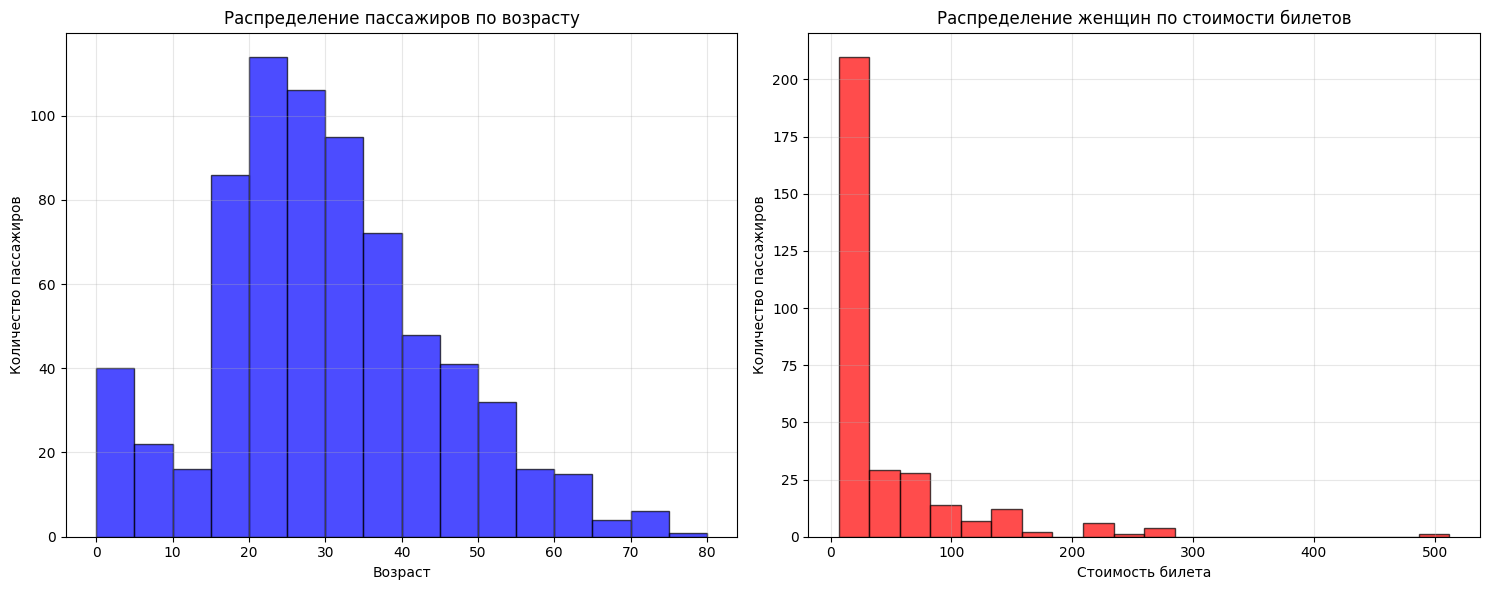

In [ ]:
url = 'https://raw.githubusercontent.com/akobzarev/dap-2024/main/les05/data/titanic.csv'
titanic_df = pd.read_csv(url)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

titanic_age_clean = titanic_df.dropna(subset=['Age'])
ax1.hist(titanic_df['Age'], bins=range(0, 85, 5), alpha=0.7, color='blue', edgecolor='black')
ax1.set_xlabel('Возраст')
ax1.set_ylabel('Количество пассажиров')
ax1.set_title('Распределение пассажиров по возрасту')
ax1.grid(True, alpha=0.3)

women_fare = titanic_df[(titanic_df['Sex'] == 'female') & (titanic_df['Fare'].notna())]
ax2.hist(women_fare['Fare'], bins=20, alpha=0.7, color='red', edgecolor='black')
ax2.set_xlabel('Стоимость билета')
ax2.set_ylabel('Количество пассажиров')
ax2.set_title('Распределение женщин по стоимости билетов')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Задача 5

Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму:

*   Диаграмма должна быть вертикальной
*   По оси X - класс каюты пассажира (Pclass)
*   По оси Y - средняя стоимость за проезд для данного класса (Fare)
*   График должен иметь подписи к осям, легенду и заголовок



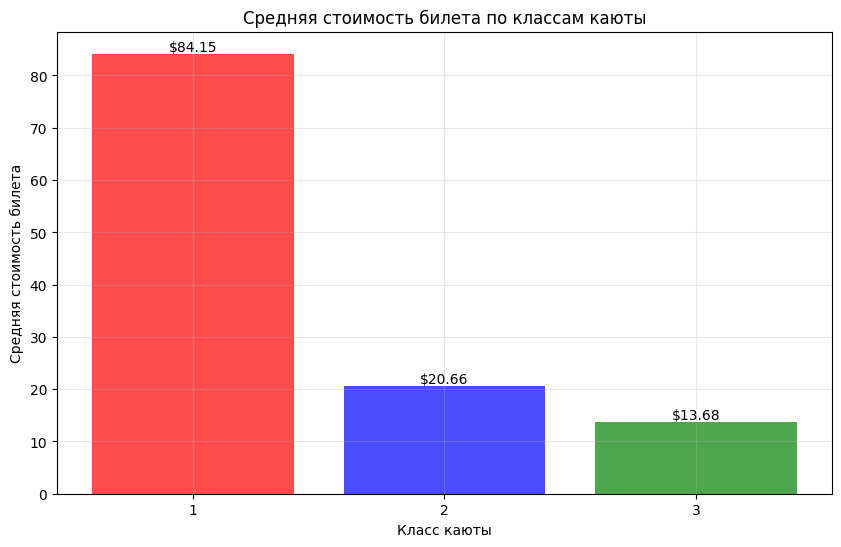

In [ ]:
url = 'https://raw.githubusercontent.com/akobzarev/dap-2024/main/les05/data/titanic.csv'
titanic_df = pd.read_csv(url)
fare_by_class = titanic_df.groupby('Pclass')['Fare'].mean()

plt.figure(figsize=(10, 6))
bars = plt.bar(fare_by_class.index, fare_by_class.values,
              color=['red', 'blue', 'green'], alpha=0.7)

plt.xlabel('Класс каюты')
plt.ylabel('Средняя стоимость билета')
plt.title('Средняя стоимость билета по классам каюты')
plt.xticks([1, 2, 3])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.2f}',
             ha='center', va='bottom')

plt.grid(True, alpha=0.3)
plt.show()

Задача 6

Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму c накоплением:

*   Диаграмма должна быть вертикальной
*   По оси X - класс каюты пассажира (Pclass)
*   По оси Y - количество пассажиров с разбивкой по полу (Sex)
*   График должен иметь подписи к осям, легенду и заголовок



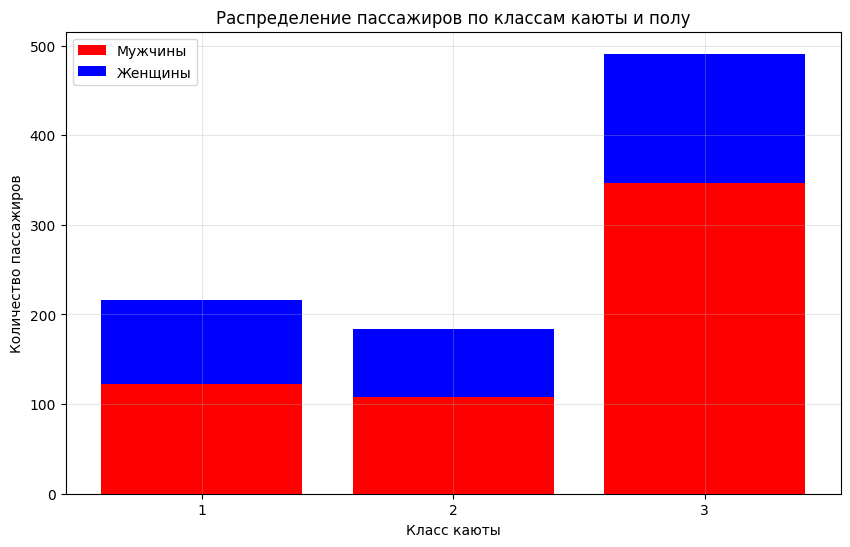

In [ ]:
url = 'https://raw.githubusercontent.com/akobzarev/dap-2024/main/les05/data/titanic.csv'
titanic_df = pd.read_csv(url)
passengers_by_class_sex = titanic_df.groupby(['Pclass', 'Sex']).size().unstack()

plt.figure(figsize=(10, 6))
bars = plt.bar(passengers_by_class_sex.index, passengers_by_class_sex['male'],
              label='Мужчины', color='red')
plt.bar(passengers_by_class_sex.index, passengers_by_class_sex['female'],
        bottom=passengers_by_class_sex['male'], label='Женщины', color='blue')

plt.xlabel('Класс каюты')
plt.ylabel('Количество пассажиров')
plt.title('Распределение пассажиров по классам каюты и полу')
plt.legend()
plt.xticks([1, 2, 3])
plt.grid(True, alpha=0.3)
plt.show()

Задача 7

Для набора данных iris постройте круговую диаграмму

*   Диаграмма должна иметь 3 сектора отражающих долю ирисов данного вида в наборе
*   Сектор с максимальной долей долен быть выдвинут
*   График должен иметь подписи к осям, легенду и заголовок



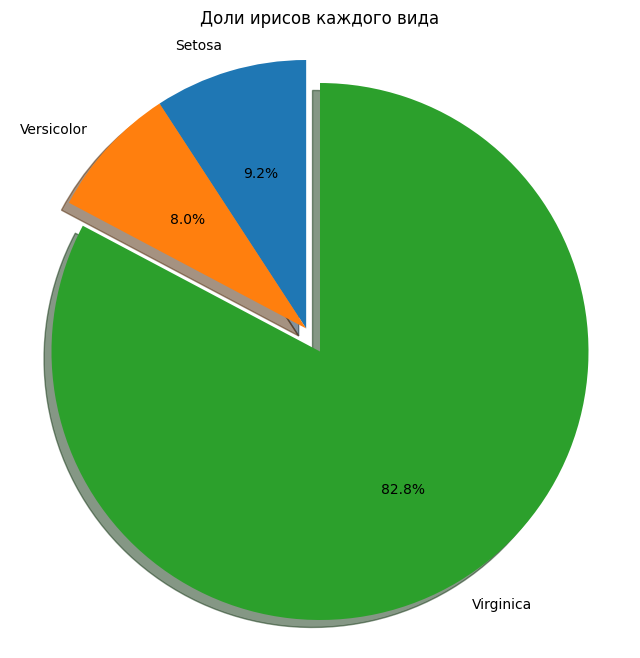

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

np.random.seed(47)
random_counts = np.random.randint(1, 100, size=3)
random_counts = random_counts / random_counts.sum() * 100
target_names = ["Setosa", "Versicolor", "Virginica"]

max_index = np.argmax(random_counts)

explode = [0.1 if i == max_index else 0 for i in range(len(target_names))]

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(random_counts, explode=explode, labels=target_names, autopct="%1.1f%%", shadow=True, startangle=90)
ax.axis("equal")

ax.set_title("Доли ирисов каждого вида")

plt.show()

Задача 8

Использую библиотеку Seaborn постройте гистограмму для возраста пассажиров "Титаника"

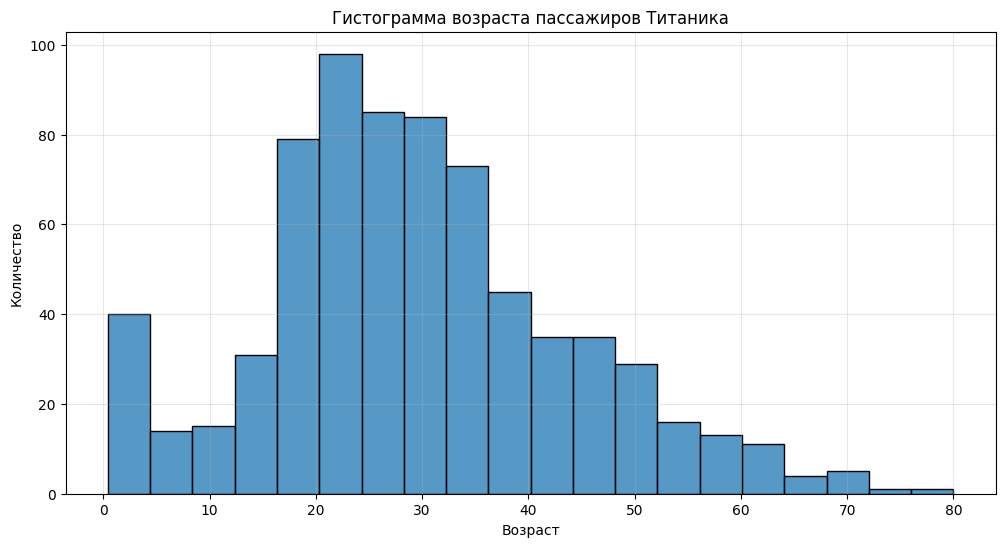

In [ ]:
url = 'https://raw.githubusercontent.com/akobzarev/dap-2024/main/les05/data/titanic.csv'
titanic_df = pd.read_csv(url)
plt.figure(figsize=(12, 6))
sns.histplot(data=titanic_df, x='Age', bins=20, kde=False)
plt.title('Гистограмма возраста пассажиров Титаника')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.grid(True, alpha=0.3)
plt.show()